In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.rcParams['text.latex.unicode'] = True


/Users/jslater/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:582: UserWarning: matplotlibrc text.usetex can not be used unless ghostscript-8.60 or later is installed on your system
  % gs_req)


second order
on to state space
[[ 6.11014807e-12 -4.09835182e-12]
 [ 1.42057024e-12 -7.02622938e-12]]
Constant term of FFT of signal should be zero:  (1.9081958235744878e-17+0j)
on to state space
[[-2.14516624e-12 -4.96904744e-12  3.85635721e-14 -6.51966255e-15
  -2.41996735e-13 -5.27259020e-13]
 [-1.56015062e-12 -1.02396267e-11 -9.73592067e-15 -2.05416694e-13
  -7.08425755e-13 -1.89628532e-12]]
Constant term of FFT of signal should be zero:  (-7.632783294297951e-17+0j)
[[-0.01039999  0.52526596  0.85219917  0.92080925  0.73014714  0.29325872
  -0.27439117 -0.72047079 -0.91897883 -0.85775937 -0.5396823 ]
 [ 0.10151528  0.07897289  0.03477871 -0.0108248  -0.05572575 -0.09438379
  -0.09561399 -0.05728763 -0.0121241   0.03345823  0.07723494]] [[ 1.28577704e-13 -4.66016115e-14 -2.08721929e-14 -9.70386965e-14
  -4.72538675e-15  4.86277685e-14 -7.23032745e-15 -6.25471896e-14
  -9.42822209e-14  5.72805692e-14 -3.35009798e-14]
 [-3.41100845e-15  1.38338126e-13 -5.91036421e-11 -2.92572452e-10
 

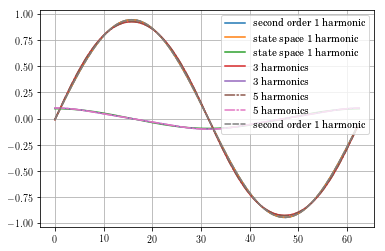

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar  7 14:10:25 2018

@author: kirby
"""


import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin
from scipy.fftpack import *

plt.close('all')
def duff_osc_ss(x, params):
    omega = params['omega']
    t = params['cur_time']
    xdot = np.array([[x[1]],[-x[0]-.1*x[0]**3-.1*x[1]+1*sin(omega*t)]])
    return xdot

def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-0.1*x**3-.1*v+1*sin(omega*t)]])

print('second order')
tfso, xfso, e, amps, phases = ms.hb_freq(duff_osc2, sp.array([[.1,-.1,0]]), omega = 0.1, \
                            eqform='second_order', num_harmonics=1, num_time_steps = 51, f_tol = 1e-10)

plt.figure()
#plt.plot(time, xc.T, t, x.T, '*')
time, xc = ms.time_history(tfso,xfso)
plt.plot(time, xc.T, label = 'second order 1 harmonic')


print('on to state space')
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), omega = 0.1, \
                            eqform='first_order', num_harmonics=1, num_time_steps = 51, f_tol = 1e-7)

#print(x,e)
print(e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)


#plt.plot(time, xc.T, t, x.T, '*')
plt.plot(time, xc.T, label = 'state space 1 harmonic')


print('on to state space')
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), omega = 0.1, \
                            eqform='first_order', num_harmonics=3, num_time_steps = 51, f_tol = 1e-7)

print(e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

plt.plot(time, xc.T, label = '3 harmonics')



t, x, e, amps, phases = ms.hb_time(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), omega = 0.1, eqform='first_order', 
                                   num_harmonics=5)

print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

#plt.figure()
#plt.plot(time, xc.T, t, x.T, '*')
plt.plot(time, xc.T,'-.', label = '5 harmonics')
#plt.plot(time, xc.T, '3 harmonics')

time, xc = ms.time_history(tfso,xfso)
plt.plot(time, xc.T, '--', label = 'second order 1 harmonic')
#plt.grid(True)
#plt.legend(['hb_freq Displacement','hb_freq Velocity','hb_time Displacement','hb_time Velocity'])
plt.legend()
plt.grid()

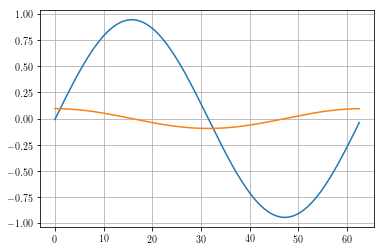

In [3]:
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), .1, \
                            eqform='first_order', num_harmonics=1, num_time_steps = 51, f_tol = 1e-7)
time, xc = ms.time_history(t,x)
plt.plot(time, xc.T)
plt.grid(True)

In [4]:
e

array([[ 6.11014807e-12, -4.09835182e-12],
       [ 1.42057024e-12, -7.02622938e-12]])

In [5]:
tfso, xfso, e, amps, phases = ms.hb_freq(duff_osc2, sp.array([[.1,-.1,0]]), .1, \
                            eqform='second_order', num_harmonics=1, num_time_steps = 51)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[-4.51508908e-10 -3.68637431e-09]]
Constant term of FFT of signal should be zero:  (1.9081958235744878e-17+0j)


In [6]:
tfso, xfso, e, amps, phases = ms.hb_freq(duff_osc2, num_variables=1, omega = 0.2, \
                            eqform='second_order', num_harmonics=5, mask_constant=False, num_time_steps = 501, f_tol = 1e-10)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[-4.21601663e-11  2.06073875e-11  3.91625760e-11  1.49842769e-11
  -2.75224080e-11 -2.00321577e-11 -5.70806888e-11 -7.32032897e-12
   1.69858586e-11  2.56796522e-13  1.09424955e-11]]
Constant term of FFT of signal should be zero:  (1.9081958235744878e-17+0j)


In [7]:
e

array([[-4.21601663e-11,  2.06073875e-11,  3.91625760e-11,
         1.49842769e-11, -2.75224080e-11, -2.00321577e-11,
        -5.70806888e-11, -7.32032897e-12,  1.69858586e-11,
         2.56796522e-13,  1.09424955e-11]])

In [8]:
xfso

array([[-0.03242912,  0.54981788,  0.86040844,  0.94737891,  0.74788442,
         0.32695025, -0.2816328 , -0.73791066, -0.93460228, -0.88170109,
        -0.56416394]])

Text(0.5,1,'Second order with 3 harmonics')

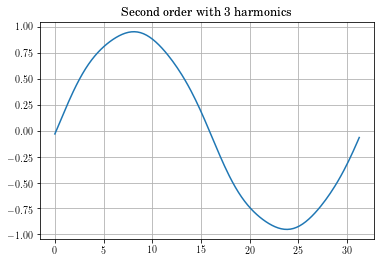

In [9]:
time, xc = ms.time_history(tfso,xfso)

plt.plot(time,xc.T)
plt.grid(True)
plt.title('Second order with 3 harmonics')

In [10]:
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0,1,-1],[.1,-.1,0]]), .1, \
                            eqform='first_order', num_harmonics=1, num_time_steps = 51)#, f_tol = 1e-12)
print('x = ', x)

x =  [[-0.0089479   0.82363988 -0.81469198]
 [ 0.09458913 -0.04651966 -0.04806948]]


In [11]:
e

array([[ 6.11014807e-12, -4.09835182e-12],
       [ 1.42057024e-12, -7.02622938e-12]])

Text(0.5,1,'State space with 3 harmonics')

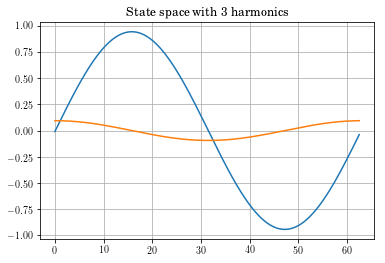

In [12]:
time, xc = ms.time_history(t,x)

plt.plot(time,xc.T)
plt.grid(True)
plt.title('State space with 3 harmonics')

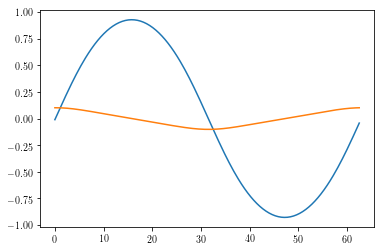

In [13]:
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, num_variables = 2, omega = 0.1,
                                   eqform='first_order', num_harmonics=5, num_time_steps=51, mask_constant=True, f_rtol = 1e-8)#, f_rtol=1e-8)
time, xc = ms.time_history(t, x)
plt.plot(time, xc.T, label='5 harmonics')

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:476: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


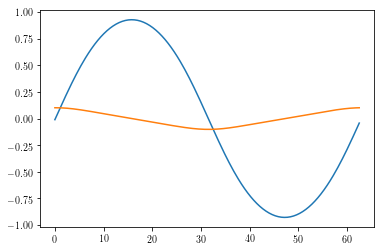

In [14]:
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, x0 = x, omega = 0.1,
                                   eqform='first_order', num_harmonics=5, num_time_steps=501, mask_constant=True)#, f_rtol = 1e-8)#, f_rtol=1e-8)
time, xc = ms.time_history(t, x)
plt.plot(time, xc.T, label='5 harmonics')

In [15]:
e[0,:]

array([ 2.97210699e-16,  2.99660039e-18,  3.00766780e-16, -5.46025033e-17,
        2.01847324e-16,  6.24921018e-17, -3.24441405e-16,  1.35786207e-16,
       -3.23564866e-16, -2.18315442e-16])

ss 1
ss 3
[[-2.14311653e-12 -4.96362386e-12  3.00848948e-14 -4.12724722e-15
  -2.95001565e-13 -5.55438119e-13]
 [-1.47733220e-12 -1.06241971e-11 -4.67820026e-14 -1.24719700e-13
  -7.98423837e-13 -1.84443363e-12]]
ss 5
[[-1.34859807e-14 -7.25206451e-16  7.08049606e-15  2.67639781e-15
   4.90583682e-15  3.45813679e-15  4.89511001e-15 -2.87054656e-15
   7.11233377e-15 -4.88032750e-15]
 [-1.07502715e-14 -6.67308769e-13  1.33500129e-14  2.37640135e-14
   1.52139239e-14 -1.17099220e-13 -1.31167025e-14 -1.04777743e-14
  -1.14137115e-14 -1.00101420e-14]]


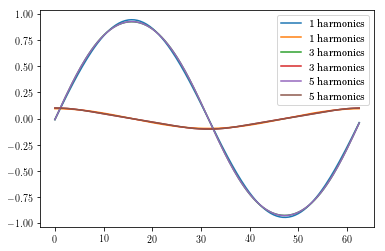

In [16]:
print('ss 1')
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0, 1, -1], [.1, -.1, 0]]), .1,
                                   eqform='first_order', num_harmonics=1, num_time_steps=501)
time, xc = ms.time_history(t, x)
plt.plot(time, xc.T, label='1 harmonics')

print('ss 3')
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, sp.array([[0, 1, -1], [.1, -.1, 0]]), .1,
                                   eqform='first_order', num_harmonics=3, num_time_steps=501)  # , f_tol = 1e-8)
time, xc = ms.time_history(t, x)
print(e)
plt.plot(time, xc.T, label='3 harmonics')

print('ss 5')
t, x, e, amps, phases = ms.hb_freq(duff_osc_ss, x, .1,
                                   eqform='first_order', num_harmonics=5, num_time_steps=501, mask_constant=True, f_tol=1e-10)

print(e)
time, xc = ms.time_history(t, x)
plt.plot(time, xc.T, label='5 harmonics')

plt.legend()

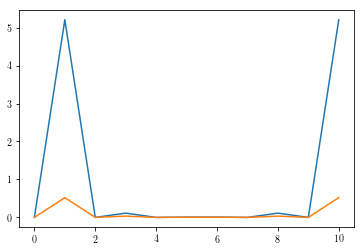

In [17]:
plt.plot(np.abs(fft(x).T))

In [18]:
e

array([[-1.34859807e-14, -7.25206451e-16,  7.08049606e-15,
         2.67639781e-15,  4.90583682e-15,  3.45813679e-15,
         4.89511001e-15, -2.87054656e-15,  7.11233377e-15,
        -4.88032750e-15],
       [-1.07502715e-14, -6.67308769e-13,  1.33500129e-14,
         2.37640135e-14,  1.52139239e-14, -1.17099220e-13,
        -1.31167025e-14, -1.04777743e-14, -1.14137115e-14,
        -1.00101420e-14]])

In [19]:
X = fft(x)
X[:,2:9]= 0*X[:,2:9]
x = ifft(X)

In [20]:
x

array([[-0.0090069 +9.63875444e-16j,  0.5044076 +9.00765094e-16j,
         0.85767626-2.15492758e-16j,  0.93863876-1.07980295e-15j,
         0.72159009-6.81639953e-16j,  0.27544167+5.13476008e-16j,
        -0.25815754+1.10825124e-15j, -0.70979356+4.07292397e-16j,
        -0.93607513-7.69860485e-16j, -0.86515946-1.04691560e-15j,
        -0.51956178-9.99484334e-17j],
       [ 0.0946996 -2.35961818e-17j,  0.08015332-2.30142801e-16j,
         0.04015893-1.67613368e-16j, -0.01258564+9.08845826e-17j,
        -0.06133435+2.43123008e-16j, -0.09060985+1.11109312e-16j,
        -0.09111735-1.50810055e-16j, -0.06269575-2.36406834e-16j,
        -0.01436868-4.56038413e-17j,  0.03852034+1.98517794e-16j,
         0.07917942+2.10538385e-16j]])

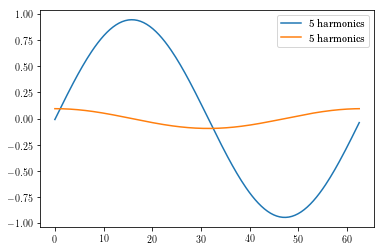

In [21]:
time, xc = ms.time_history(t, x)
plt.plot(time, xc.T, label='5 harmonics')

plt.legend()

In [22]:
e

array([[-1.34859807e-14, -7.25206451e-16,  7.08049606e-15,
         2.67639781e-15,  4.90583682e-15,  3.45813679e-15,
         4.89511001e-15, -2.87054656e-15,  7.11233377e-15,
        -4.88032750e-15],
       [-1.07502715e-14, -6.67308769e-13,  1.33500129e-14,
         2.37640135e-14,  1.52139239e-14, -1.17099220e-13,
        -1.31167025e-14, -1.04777743e-14, -1.14137115e-14,
        -1.00101420e-14]])

In [23]:
np.max(e)

2.3764013454246053e-14

In [24]:
import scipy.integrate as odeint

In [25]:
help(odeint.solve_ivp)

Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a one-dimensional independent variable (time), y(t) is an
    n-dimensional vector-valued function (state), and an n-dimensional
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note that
    for stiff ODE solvers, the right-hand side must be complex-differentiable
    (satisfy Cauchy-Riemann equations [11]_). To solve a problem in the complex
    doma

In [26]:
def duff_osc_ss(t, x):
    omega = 0.1    
    xdot = np.array([x[1],-x[0]-.1*x[0]**3-.1*x[1]+1*sin(omega*t)])
    return xdot

In [27]:
sol = odeint.solve_ivp(fun = duff_osc_ss, t_span=(0,600), y0 = np.array([0,0]))

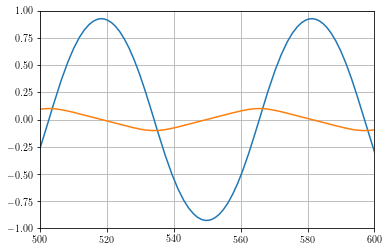

In [28]:
plt.plot(sol.t,sol.y.T)
plt.axis([500,600,-1,1])
plt.grid(True)

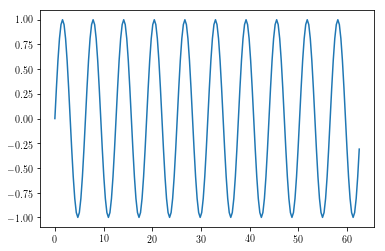

In [29]:
time
y = sin(time)
plt.plot(time, sin(time))

In [30]:
import scipy.fftpack as fftp

In [31]:
ffty = fftp.fft(y)

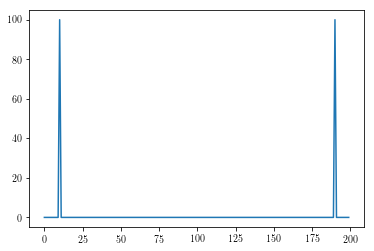

In [32]:
plt.plot(np.abs(ffty))

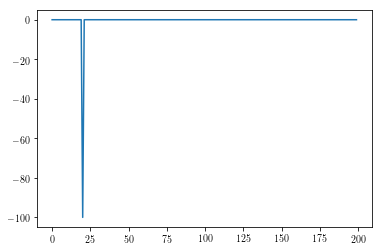

In [33]:
plt.plot(ms.fft_to_rfft(ffty))

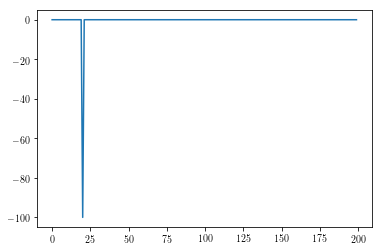

In [34]:
plt.plot(rfft(y))

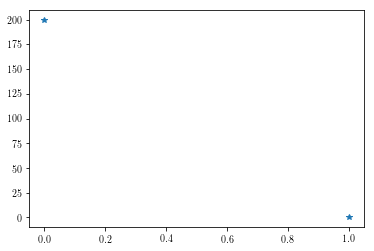

In [35]:
plt.plot(rfft(y+1)[:2],'*')

In [36]:
y.size

200

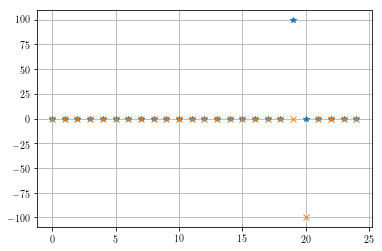

In [37]:
plt.plot(rfft(np.cos(time))[:25],'*',rfft(y)[:25],'x')
plt.grid()

In [38]:
rfft = ms.fft_to_rfft(ffty)
rfft

array([-6.23085483e-15,  3.65510101e-16,  7.69951025e-16, -6.36491753e-15,
        1.05094900e-15,  4.34409923e-16,  4.57159117e-15, -3.67719809e-15,
        3.78997887e-15, -2.10270340e-15,  8.11578815e-15, -7.34600178e-15,
        7.81693320e-15, -2.00710084e-15,  1.32811324e-14, -5.37005458e-15,
        1.90136542e-14,  6.64379137e-16,  3.63745285e-14, -1.40211486e-13,
       -1.00000000e+02, -1.03886241e-15, -3.96452581e-14, -1.03191619e-14,
       -2.13367569e-14,  1.03808448e-15, -1.43332521e-14, -3.07580320e-14,
       -1.23109705e-14, -9.82541347e-15, -6.94832314e-14,  2.72928007e-14,
       -8.39982935e-15, -4.66247286e-16, -8.39996108e-15,  6.41440650e-15,
       -6.92582565e-15,  5.74587678e-16, -5.39378006e-15,  8.45678455e-15,
       -4.57075312e-15,  7.01400090e-16, -6.11213130e-15,  1.25393487e-15,
       -5.16210277e-15, -2.55473457e-17, -4.49127876e-15,  2.08623362e-15,
       -4.36686410e-15,  1.44873246e-15, -7.29861897e-15, -1.90295910e-15,
       -4.58957064e-15,  

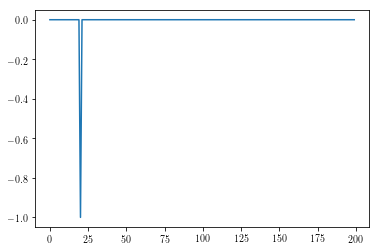

In [39]:
plt.plot(rfft/np.max(np.abs(rfft)))

In [40]:
from scipy.fftpack import *

In [41]:
a = np.array([[9, -9, 1, -1],[9, -9, 1, -1]])
fft(a)

array([[ 0.+0.j,  8.+8.j, 20.+0.j,  8.-8.j],
       [ 0.+0.j,  8.+8.j, 20.+0.j,  8.-8.j]])

In [42]:

rfft(a)

array([[ 0.,  8.,  8., 20.],
       [ 0.,  8.,  8., 20.]])

In [44]:
fft(a)

array([ 0. +0.j        , 13.5+7.79422863j, 13.5-7.79422863j])

In [45]:
rfft(a)

array([ 0.        , 13.5       ,  7.79422863])

In [46]:
time = np.array([0,1,2,3])


In [ ]:
plt.plot(time_e, x.T*3.2/5, time, a.T, '*')

In [ ]:
x[0,0]

In [ ]:
a[0,0]

In [ ]:
rfft(a)

In [ ]:
rfft(x)

In [ ]:
plt.plot(irfft(x).T)

In [ ]:
x.shape

In [ ]:
time

In [ ]:
np.sin(time)

In [ ]:
tt = np.linspace(0,np.pi*2,101)

In [ ]:
np.zeros((2,2)).shape


In [ ]:
plt.plot(tt,sin(tt))

In [ ]:
rft = rfft(np.cos(tt))
rft

In [ ]:
rft[3:]= rft[3:]*0
rft

In [ ]:
plt.plot(irfft(rft))

In [ ]:
a

In [ ]:
time

In [ ]:
plt.plot(time, a.T, '*')

In [ ]:
b = irfft(np.hstack((rfft(a), a*0)))

In [ ]:
plt.plot(b.T)